In [36]:
#Reconocimiento <> Deteccion.
from sklearn.datasets import fetch_lfw_people #Dataset con imagenes
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
#min_faces_per_person=60, de cada persona sacar 60 imagenes
#C:\Users\Vic\scikit_learn_data\lfw_home\lfw_funneled
faces = fetch_lfw_people(min_faces_per_person=60)

In [20]:
#Nombre de los objetivos 'Y'
#print(faces.target_names)
faces.target_names

array(['Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder',
       'Junichiro Koizumi', 'Tony Blair'], dtype='<U17')

In [21]:
#print(faces.images.shape)
#964 (total de imagenes), 62 (ancho de la imagen), 47(alto de la imagen)
faces.images.shape

(964, 62, 47)

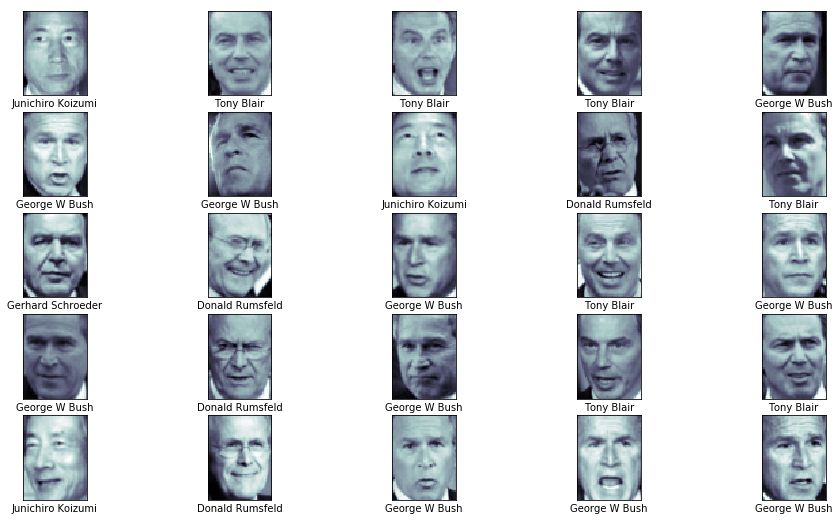

In [23]:
#Figura, ax(para mostrar los rostros)
#Generar una matriz de 5x5
fig, ax = plt.subplots(5,5,figsize=(16,9))
#Cada imagen enumerar.
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i],cmap="bone")#mostrar la imagen en fondo color 'bone'
    ax_i.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])#Asignar nombres a las imagenes

In [24]:
#Tamano de la imagen. Multiplicar ancho x alto.
#62*47

#Detectar rostros.
#Reconocimiento facial.

2914

In [25]:
from sklearn.svm import SVC #Clasificacion
from sklearn.decomposition import PCA as RandomizedPCA #Verificaciones aleatorioas.
from sklearn.pipeline import make_pipeline #Manejo de filtros o tuberias.

In [26]:
#n_components=150, 
#whiten=True, hacer el entrenamiento con valores aleatorios
#random_state=42, es un numero magico en clasificacion en imagenes.
#Analisis de componentes principales, el objetivo es reduciar la cantidad de variables a utilizar
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
#kernel=rbf, kernel gausiano.
#class_weight, pesos balanceados. Las redes neuronales necesitan pesos. Similar a estandarizar datos.
svc = SVC(kernel="rbf", class_weight="balanced")
#Filtro que alimenta con las imagene al model
model = make_pipeline(pca,svc)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
#faces estan todas las imagenes.
#faces.data=X, tiene toda la data.
#faces.target=Y, la variable a predecir.
x_train, x_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

In [37]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,...,2904,2905,2906,2907,2908,2909,2910,2911,2912,2913
0,69.333336,81.333336,97.333336,115.333336,134.000000,143.666672,153.333328,166.333328,172.666672,174.000000,...,81.666664,26.000000,19.333334,26.333334,27.333334,31.333334,35.666668,39.333332,43.666668,43.666668
1,18.000000,32.666668,46.666668,45.333332,38.666668,30.333334,21.666666,46.000000,102.000000,135.000000,...,82.666664,84.000000,89.000000,97.000000,109.666664,125.333336,137.000000,140.000000,133.333328,127.333336
2,129.333328,127.666664,124.000000,124.666664,126.000000,123.666664,125.333336,132.000000,138.333328,144.000000,...,226.666672,180.666672,66.333336,26.333334,33.666668,46.666668,58.000000,62.666668,64.666664,64.333336
3,60.666668,66.666664,84.666664,102.000000,105.333336,109.666664,119.000000,126.333336,128.666672,131.666672,...,112.333336,114.000000,144.666672,217.666672,243.333328,241.666672,240.000000,237.666672,235.000000,229.333328
4,124.000000,139.000000,161.000000,174.000000,180.000000,180.333328,181.000000,184.000000,187.000000,189.333328,...,119.666664,132.333328,151.000000,153.666672,105.333336,36.000000,13.333333,9.666667,8.000000,7.000000


In [38]:
pd.DataFrame(y_train).head()

,0
0,4
1,4
2,0
3,1
4,0


In [40]:
from sklearn.model_selection import GridSearchCV #Para buscar y realizar el entrenamiento de rostro

In [42]:
#"svc__C", son valores neutrales a la hora de entrenar
#"svc__gamma",son valores neutrales
param_grid = {
    "svc__C":[0.1,1,5,10,50],
    "svc__gamma":[0.0001,0.0005,0.001,0.005,0.01]    
}
#model, en el modelo hemos pasado las imagenes de forma aleatorio
#param_grid, parametros de delimitacion de entrenamiento
grid = GridSearchCV(model, param_grid)
%time grid.fit(x_train,y_train) #Entrenamiento

C:\Users\Vic\Anaconda2\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Vic\Anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 41.9 s


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('pca', PCA(copy=True, iterated_power='auto', n_components=150, random_state=42,
  svd_solver='auto', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'svc__C': [0.1, 1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
#Objetener los mejores parametros
print(grid.best_params_)

#svc_c y svc_gamma, no tienen que estar en los extremos porque no se han podido verificar la imagenes.
#Si hay datos extremos entonces repetir el entrenamiento.
#Esos datos el sistema lo elige
#{'svc__C': 10, esta al centro
#'svc__gamma': 0.001}, esta al centro

{'svc__C': 10, 'svc__gamma': 0.001}


In [49]:
#El mejor estimador
clasificador = grid.best_estimator_
#prediccion
yfit = clasificador.predict(x_test)

Text(0.5, 0.98, 'Predicciones de las imagenes (incorrectas en rojo)')

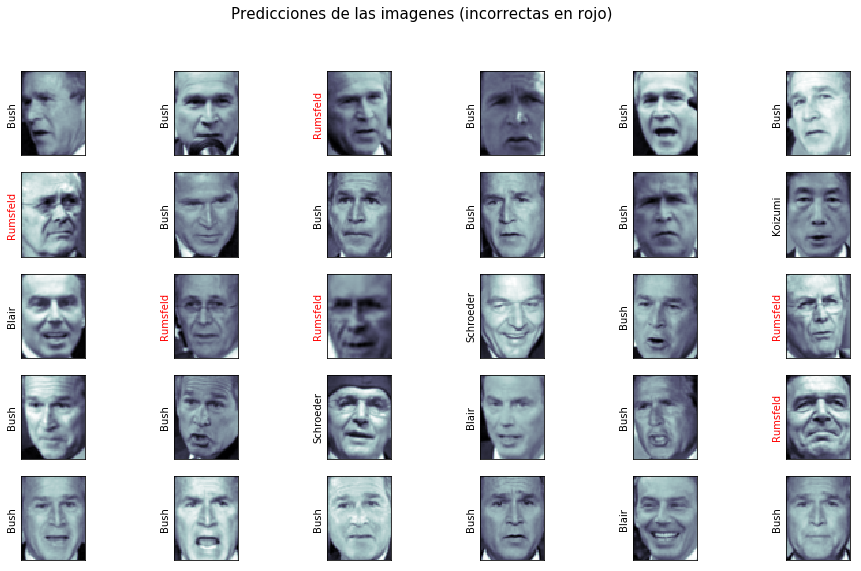

In [50]:
#Mostrar la prediccion en imagenes. Pintar de rojo la imagenes equivocadas.
fig, ax = plt.subplots(5,6,figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(x_test[i].reshape(62,47), cmap="bone")
    ax_i.set(xticks=[],yticks=[])
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color = "black" if yfit[i] else "red")
fig.suptitle("Predicciones de las imagenes (incorrectas en rojo)", size=15)

In [51]:
#En vez tener un matriz de confusion, se puede tener un reporte de clasificacion.
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,yfit,target_names=faces.target_names))

#La presicion que ha tenido el algoritmo con cada rostro.
#Junichiro Kizumi ha ganando
#Cuando la precision es baja, puede deberse a la calidad de imagenes, pixeles, posicion, color, fondo, etc.

#precision, nivel de presicion con el rostro.
#recall, nivel de sensibilidad, se ha reaizado buenos aciertos.
#f1-score, puntaje que entrega el modelo a cada imagen.
#support, numero de individos  que ha podido verificacar

                   precision    recall  f1-score   support

  Donald Rumsfeld       0.86      0.91      0.89        35
    George W Bush       0.94      0.92      0.93       130
Gerhard Schroeder       0.91      0.77      0.83        26
Junichiro Koizumi       1.00      0.93      0.96        14
       Tony Blair       0.80      0.92      0.86        36

        micro avg       0.90      0.90      0.90       241
        macro avg       0.90      0.89      0.89       241
     weighted avg       0.91      0.90      0.90       241



In [53]:
from sklearn.metrics import confusion_matrix

In [55]:
mat = confusion_matrix(y_test, yfit)#y_test, yfit (prediccion)
mat

array([[ 32,   3,   0,   0,   0],
       [  4, 120,   0,   0,   6],
       [  1,   3,  20,   0,   2],
       [  0,   0,   1,  13,   0],
       [  0,   2,   1,   0,  33]], dtype=int64)

In [57]:
import seaborn as sns; sns.set()

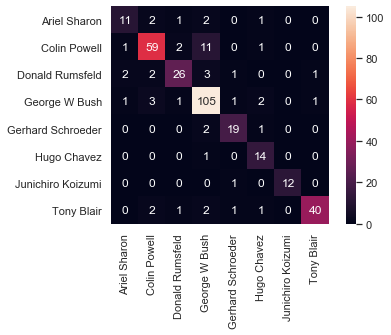

In [23]:
#Mapa de calor
sns.heatmap(mat.T, square=True, annot=True, fmt = "d", cbar=True,
           xticklabels=faces.target_names, yticklabels=faces.target_names)

#Cuando mas claro es el color 100, hay mas efectividad.